<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Red_Multicapa/Flor_de_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales


## Redes Multicapa (MLP)

MLP significa Perceptrón Multicapa (del inglés Multi-Layer Perceptron). Es un tipo fundamental de red neuronal artificial utilizada en el aprendizaje automático y el aprendizaje profundo.
¿Qué es y cómo funciona?
Un MLP es una red neuronal de propagación hacia adelante compuesta por múltiples capas de neuronas (o nodos) organizadas en una estructura jerárquica:
* Capa de Entrada: Recibe los datos iniciales para su procesamiento.
* Capas Ocultas: Una o más capas intermedias donde se realiza la mayor parte del procesamiento. Cada neurona en estas capas está conectada a las neuronas de la capa siguiente.
* Capa de Salida: Produce el resultado final de la red (por ejemplo, una clasificación o una predicción).

A diferencia del perceptrón simple, que solo puede modelar relaciones lineales, el MLP utiliza funciones de activación no lineales en sus capas ocultas, lo que le permite aprender y modelar patrones complejos y relaciones no lineales en los datos. El proceso de aprendizaje generalmente utiliza un algoritmo llamado retropropagación de errores para ajustar los pesos (la fuerza de las conexiones entre neuronas) y mejorar la precisión del modelo.

## Conjunto de datos de la Flor del Irís

Dicho dataset, es un conjunto de datos multivariado utilizado por el estadístico y biólogo británico Ronald Fisher en su artículo "El uso de mediciones múltiples en problemas taxonómicos como ejemplo de análisis discriminante lineal" de 1936.

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris: Iris setosa, Iris virginica e Iris versicolor. De cada muestra se midieron (en centímetros) cuatro características : el largo y el ancho de los sépalos y pétalos.

#### Carga de datos

In [1]:
"""
Cargamos el dataset
"""
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
"""
Identificamos que tipo de objeto es
"""
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
"""
Estructura del dataset
"""
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
"""
DESCR, es una llave importante, porque contiene información del dataset de la flor de Iris
"""
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
"""
Exploramos más valores de algunas llaves.
"""
iris.target_names
iris.target
iris.data
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

""" Preparación de datos """

In [6]:
"""
Convertimos a un dataframe
"""
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
"""
Descripciones estadísticas de los datos
"""
iris_df.shape #Muestra la lóngitud de la tabla

(150, 4)

In [8]:
"""
Descripciones estadísticas de los datos
"""
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


""" Procesamiento de datos """

In [9]:
"""
Procesamiento de datos
"""
X = iris_df
y = pd.get_dummies(iris.target).values #

In [10]:
X #Conjunto de entradas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y #Conjuntos de salidas

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

#### Conjuntos de entrenamiento y prueb

In [12]:
"""
División de los datos en conjuntos de entrenamiento y prueba
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [13]:
"""
Longitud del conjunto de entrenamiento y de test
"""
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


""" Escalado de datos """

*Con el fin de que los datos tengan una media de 0 y una desviación estándar de 1*

In [14]:
"""
Escalado de datos
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Red Neuronal Multicapa

""" Creación del Modelo """

In [15]:
"""
Definir el modelo
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'), #Función de activación, da mayor probabilidad (Virginica)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
"""
Compilar el modelo
"""
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [17]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Entrenamiento

In [18]:
"""
Entrenar el modelo
"""
history = modelo.fit(
    X_train, y_train,
    epochs=25, batch_size=1,
    validation_data=(X_test, y_test)
)

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4222 - loss: 1.0534 - val_accuracy: 0.8667 - val_loss: 0.4752
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8128 - loss: 0.4519 - val_accuracy: 0.9333 - val_loss: 0.3084
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9127 - loss: 0.3192 - val_accuracy: 0.9333 - val_loss: 0.2075
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9045 - loss: 0.2669 - val_accuracy: 0.9333 - val_loss: 0.1807
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.1921 - val_accuracy: 0.9667 - val_loss: 0.1334
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1738 - val_accuracy: 1.0000 - val_loss: 0.1066
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.1291 - val_accuracy: 1.0000 - val_loss: 0.0876
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.0979 - val_accuracy: 1.

#### Función de perdida

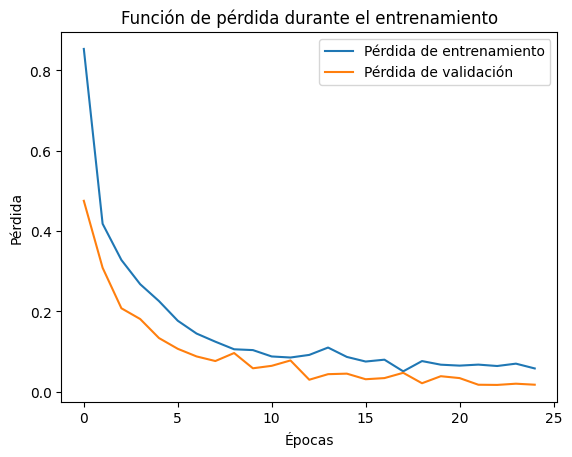

In [19]:
"""
Graficar la función perdida
"""
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


#### Evaluación del modelo

In [20]:
"""
Evaluar el modelo en el conjunto de prueba
"""
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step - accuracy: 1.0000 - loss: 0.0171
Loss: 0.017143042758107185, Accuracy: 1.0


#### Predicciones

In [21]:
"""
Realizar predicciones en el conjunto de prueba
"""
import numpy as np
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


#### Otras metricas

""" Matriz de confusión """

*Con el fin de ver cuantos valores clasifica de manera correcta y cuantos de forma erronea*

In [22]:
"""
Calcular la matriz de confusión y sensibilidad (recall)
"""
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


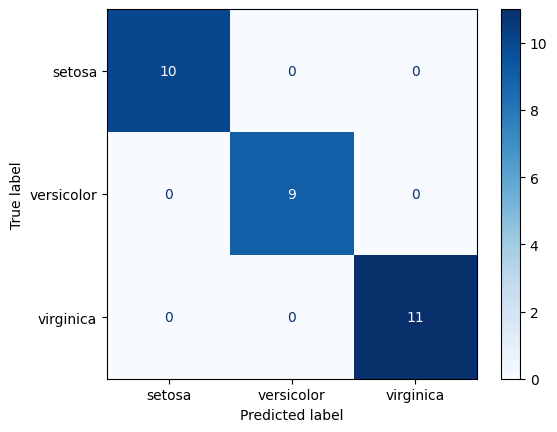

In [23]:
"""
Visualizar la matriz de confusión y mostrar la sensibilidad
"""
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')
